In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/feb_6-10.csv')


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(28944, 7)


,date,id,text,hashtags,retweet_count,location,cleaned
0,2020-02-06,1225217055944671232,"Dow jumps 480 points, S&amp;P 500 closes at re...",[],0.0,{'country_code': 'in'},dow jumps points closes record market shakes c...
1,2020-02-06,1225226471150510080,Dimapur forms task force for Coronavirus prepa...,[],0.0,{'country_code': 'in'},dimapur forms task force coronavirus preparedn...
2,2020-02-06,1225229431729319936,“South Korea reported three new cases of coron...,[],15.0,{'country_code': 'in'},south korea reported three new cases coronavir...
3,2020-02-06,1225231768426446848,"A warning from Tobias Levkovich of Citi,\n\n- ...",[],3.0,"{'country_code': 'in', 'state': 'Maharashtra'...",warning tobias levkovich citi remind clients e...
4,2020-02-06,1225241658519744512,What we know and don't know about the new coro...,[],34.0,"{'country_code': 'in', 'state': 'Chandigarh',...",know know new coronavirus


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned
28939,2020-02-10,1226836933009002499,dumber than neha sharma @Bhangari_dada https:/...,[],3.0,{'country_code': 'in'},dumber neha sharma dada
28940,2020-02-10,1226931272934707200,Is this the new trend? Eew. https://t.co/0tg1T...,[],0.0,"{'country_code': 'in', 'state': 'Uttarakhand'...",new trend ? eew
28941,2020-02-10,1226667072324718594,It Worse than Chernobyl https://t.co/ZOyikL9asb,[],0.0,{'country_code': 'in'},worse chernobyl
28942,2020-02-10,1226798502732107776,Taiwanese TV show cuts kissing scene in fear o...,[],95.0,{'country_code': 'in'},taiwanese tv show cuts kissing scene fear spre...
28943,2020-02-10,1226943684031152128,Delhites have no reason to fear the dreaded co...,[],0.0,"{'country_code': 'in', 'state': 'Karnataka', ...",delhites reason fear dreaded coronavirus mohal...


In [ ]:
print(df.shape)
df.isnull().sum()

(28944, 7)


date             0
id               0
text             0
hashtags         0
retweet_count    0
location         0
cleaned          0
dtype: int64

In [ ]:
!pip install -U pywsd

Requirement already up-to-date: pywsd in /usr/local/lib/python3.6/dist-packages (1.2.4)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0    dow jumps points closes record market shakes c...
1    dimapur forms task force coronavirus preparedn...
2    south korea reported three new cases coronavir...
3    warning tobias levkovich citi remind clients e...
4                            know know new coronavirus
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

28944


'dow jumps points closes record market shakes coronavirus fears'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

Warming up PyWSD (takes ~10 secs)... took 5.789513826370239 secs.


In [ ]:
t_clean[0]

['dow',
 'jump',
 'point',
 'close',
 'record',
 'market',
 'shake',
 'coronavirus',
 'fear']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

dow


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

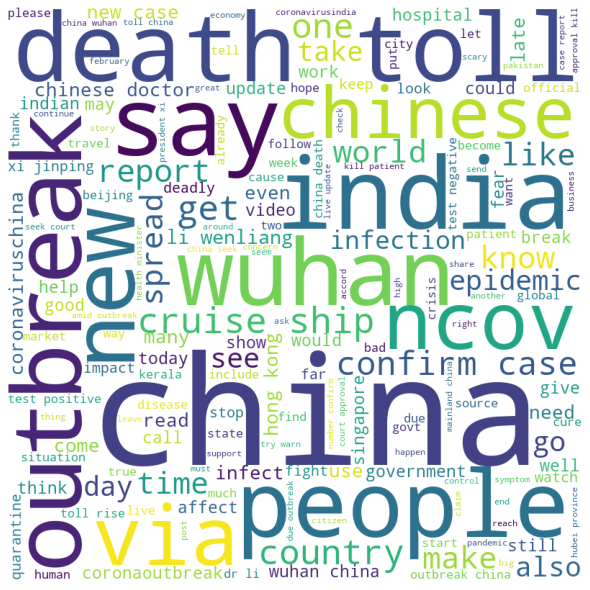

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['dow jump point close record market shake coronavirus fear',
 'dimapur form task force coronavirus preparedness screen passenger novel coronavirus dimapur airport come ncov affected country continue district prepares prevent entry virus state',
 'south korea report three new case coronavirus wednesday feb include two south korean men attend conference singapore jan come contact malaysian man infect virus',
 'warn tobias levkovich citi remind client euphoric mindset sentiment drive valn hard imagine coronavirus effect build every client want buy dip comfort ppl long mkt spx yr end target',
 'know know new coronavirus']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['accurate information',
 'accurate information government',
 'across china',
 'across globe',
 'across india',
 'across world',
 'act demand',
 'act demand accurate',
 'actual number',
 'acute respiratory',
 'ad radio',
 'ad radio tv',
 'additional case',
 'adhanom ghebreyesus',
 'admit hospital',
 'advice public',
 'air hug',
 'air india',
 'airline doctor',
 'alarm die',
 'alert sign',
 'alert sign via',
 'allow enter',
 'allow enter india',
 'amazon pull',
 'amazon withdraws',
 'amb india',
 'american dy',
 'amid fear',
 'amid outbreak',
 'among country',
 'among first',
 'anger china',
 'antiviral drug',
 'approval kill',
 'approval kill patient',
 'around world',
 'artificial intelligence',
 'asian country',
 'assistance china',
 'australia brings',
 'australia brings world',
 'authority say',
 'avoid flight',
 'avoid flight forget',
 'avoid spread',
 'avoid spread via',
 'back work',
 'bbc news',
 'best way',
 'best way avoid',
 'big online',
 'big online news',
 'bill melinda',

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:china seek,kill people,kill patient,court approval,approval kill,seek court,court approval kill,approval kill patient,seek court approval,china seek court\nTopic 1:world health,world health organization,health organization,french ski,health commission,national health,ski resort,national health commission,stay safe,come china\nTopic 2:cruise ship,confirm case,test positive,number confirm,number confirm case,total number,diamond princess,report case,quarantine japan,new death\nTopic 3:help china,communist party,whistleblower doctor,daily thanks,go china,india china,china india,die china,fake news,bbc news\nTopic 4:death toll,toll rise,china death,toll china,death toll rise,death toll china,live update,china death toll,social medium,million people\nTopic 5:new case,wuhan china,test negative,pm modi,case report,public health,health ministry,chinese national,modi offer,case confirm\nTopic 6:chinese doctor,health minister,people china,year old,ship japan,cruise ship japan,doctor try

In [ ]:
lda.perplexity(tf)

454.3060571597926

In [ ]:
f=open('lda_feb_6-10.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_feb_6-10.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_feb_6-10.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_feb_6-10.pk')
shutil.move("topics_feb_6-10.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_feb_6-10.txt')